In [1]:
import bmi.wrapper
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
model = bmi.wrapper.BMIWrapper('xbeach')

In [3]:
model.initialize('../tests/LargerModel4/params.txt')

In [4]:
for i in range(100):
    model.update(600)
model.get_current_time()

199.99999999999994

In [5]:
data = {}
for var_name in ['H', 'D', 'cgx', 'cgy']:
    data[var_name] = np.squeeze(model.get_var(var_name))


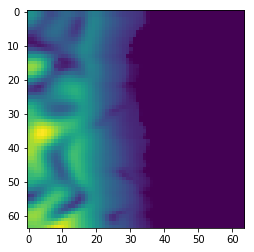

In [13]:
plt.imshow(data['H'][:64, :64])

In [7]:
for i in range(256):
    model.update(600)
    

In [8]:
import matplotlib.animation

In [9]:
data['cgx'].min(), data['cgy'].max()

(0.0, 0.21482213574991493)

In [10]:
Ns = {}
Ns['H'] = matplotlib.colors.Normalize(0, 7)
Ns['D'] = matplotlib.colors.Normalize(0, 5000)
Ns['cgx'] = matplotlib.colors.Normalize(-8, 8, clip=True)
Ns['cgy'] = matplotlib.colors.Normalize(-8, 8, clip=True)

In [11]:
for i in range(256):
    model.update(600)
    h = Ns['H'](data['H'])
    d = Ns['D'](data['D'])
    dh_img = np.dstack([d, h, np.zeros_like(h)])
    filename = "dh_{:06d}.png".format(i)
    plt.imsave(filename, dh_img[:64, :64])
    cgx = Ns['cgx'](data['cgx'])
    cgy = Ns['cgy'](data['cgy'])
    cgxy_img = np.dstack([cgx, cgy, np.zeros_like(cgx)])
    filename = "cgxy_{:06d}.png".format(i)
    plt.imsave(filename, cgxy_img[:64, :64])    


In [12]:
Ns['cgx'](data['cgx'])

masked_array(data =
 [[ 1.          1.          1.         ...,  0.74247741  0.74647193
   0.74494723]
 [ 1.          1.          1.         ...,  0.74422531  0.74647281
   0.74494723]
 [ 1.          1.          1.         ...,  0.74247676  0.74821374
   0.74678811]
 ..., 
 [ 1.          1.          1.         ...,  0.68684551  0.68278704
   0.68391015]
 [ 1.          1.          1.         ...,  0.69578321  0.69176458
   0.69282829]
 [ 1.          1.          1.         ...,  0.69418315  0.6931282
   0.69419921]],
             mask =
 False,
       fill_value = 1e+20)